In [32]:
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
help(ImageDraw)

Help on module PIL.ImageDraw in PIL:

NAME
    PIL.ImageDraw

DESCRIPTION
    # The Python Imaging Library
    # $Id$
    #
    # drawing interface operations
    #
    # History:
    # 1996-04-13 fl   Created (experimental)
    # 1996-08-07 fl   Filled polygons, ellipses.
    # 1996-08-13 fl   Added text support
    # 1998-06-28 fl   Handle I and F images
    # 1998-12-29 fl   Added arc; use arc primitive to draw ellipses
    # 1999-01-10 fl   Added shape stuff (experimental)
    # 1999-02-06 fl   Added bitmap support
    # 1999-02-11 fl   Changed all primitives to take options
    # 1999-02-20 fl   Fixed backwards compatibility
    # 2000-10-12 fl   Copy on write, when necessary
    # 2001-02-18 fl   Use default ink for bitmap/text also in fill mode
    # 2002-10-24 fl   Added support for CSS-style color strings
    # 2002-12-10 fl   Added experimental support for RGBA-on-RGB drawing
    # 2002-12-11 fl   Refactored low-level drawing API (work in progress)
    # 2004-08-26 fl   Made 

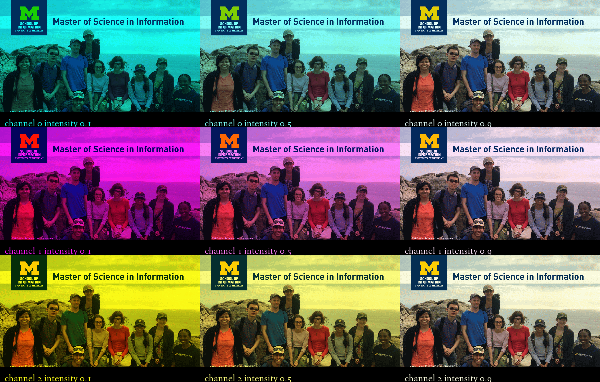

In [72]:
from PIL import Image, ImageDraw

filename = "readonly/msi_recruitment.gif"
mod_images = []
alphavals = [0.1, 0.5, 0.9]
fnt = ImageFont.truetype('readonly/fanwood-webfont.ttf', 20)

def getRgbImage():
    rgbImage=Image.open(filename).convert('RGB')
    return rgbImage

def getTextObj(intensity, alpha, fnt, out):
    rect = Image.new('RGB', (out.width, 30), color = (0, 0, 0))
    d = ImageDraw.Draw(rect)    
    d.text((10, 10), 'channel {} intensity {}'.format(intensity, alpha), font = fnt, fill = out.getpixel((0, 50)))
    return rect

def getNewSheet(out, rect):
    sheet = Image.new(out.mode, (out.width, out.height + rect.height))
    sheet.paste(rect, (0, out.height))
    sheet.paste(out, (0, 0))
    return sheet

for alpha in alphavals:
    image=getRgbImage()
    r_channel = image.getchannel(0)
    g_channel = image.getchannel(1)
    b_channel = image.getchannel(2)
    
    r_channel = r_channel.point(lambda x: x * alpha)
    out = Image.merge('RGB', (r_channel, g_channel, b_channel))
    out = out.resize((int(out.width / 2), (int(out.height / 2))))
    
    rect = getTextObj(0, alpha, fnt, out)
    sheet = getNewSheet(out, rect)
    mod_images.append(sheet)
    
for alpha in alphavals:
    image=getRgbImage()
    r_channel = image.getchannel(0)
    g_channel = image.getchannel(1)
    b_channel = image.getchannel(2)
    
    g_channel = g_channel.point(lambda x: x * alpha)
    out = Image.merge('RGB', (r_channel, g_channel, b_channel))
    out = out.resize((int(out.width / 2), (int(out.height / 2))))
    
    rect = getTextObj(1, alpha, fnt, out)
    sheet = getNewSheet(out, rect)
    mod_images.append(sheet)    
   

for alpha in alphavals:
    image=getRgbImage()
    r_channel = image.getchannel(0)
    g_channel = image.getchannel(1)
    b_channel = image.getchannel(2)
    
    b_channel = b_channel.point(lambda x: x * alpha)
    out = Image.merge('RGB', (r_channel, g_channel, b_channel))
    out = out.resize((int(out.width / 2), (int(out.height / 2))))
    
    rect = getTextObj(2, alpha, fnt, out)
    sheet = getNewSheet(out, rect)
    mod_images.append(sheet) 


# create a contact sheet from different brightnesses
first_image=mod_images[0]
contact_sheet=Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in mod_images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)    

In [45]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

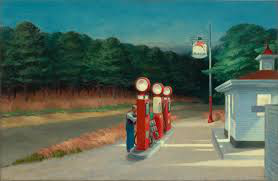

In [49]:
# get an image
base = Image.open("readonly/hopper.jpg").convert("RGBA")
base.size
display(base)

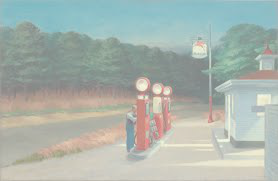

AttributeError: module 'PIL.ImageDraw' has no attribute 'bitmap'

In [56]:
base2 = base.copy()
base2.putalpha(128)
display(base2)

ImageDraw.bitmap((0,0), 'RGBA', fill=(255, 0, 0, 0.2))

#ImageDraw.floodfill(base2, (0,0), (100,100,100,0), border=None, thresh=0)
display(base2)

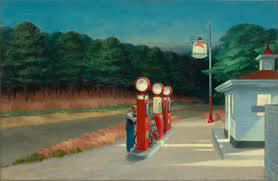

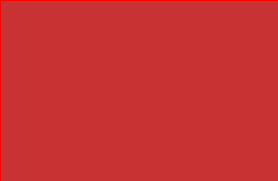

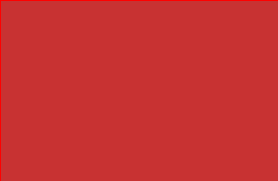

In [37]:
#display(base)

# make a blank image for the text, initialized to transparent text color
txt = Image.new("RGBA", base.size, (255,255,255,255))

# get a font
fnt = ImageFont.truetype("readonly/FreeMono.ttf", 40)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10,10), "Hello", font=fnt, fill=(255,255,255))
# draw text, full opacity
d.text((10,60), "World", font=fnt, fill=(255,255,255))

#out = Image.alpha_composite(base, txt)

#mask = Image.new('RGBA',base.size, (100,100,100,0))



mask_object=ImageDraw.Draw(txt)
mask_object.rectangle([(0,0),(txt.size)], fill=(200,50,50), outline ='red')

#m2 = ImageDraw.rectangle([0,0,mask.width, mask.height], fill=None, outline=None, width=1)

out = Image.alpha_composite(base.convert('RGBA'), txt.convert('RGBA'))
out = Image.alpha_composite(base.convert('RGBA'), txt.convert('RGBA'))
out.show
display(base)
display(txt)
display(out)